In [3]:
import pandas as pd
import numpy as np

In [4]:
# Datensatz einlesen
original_dms_data = pd.read_csv('/Users/liza/Desktop/Bioinfo Project/DMS_data/GFP_AEQVI_Sarkisyan_2016.csv')
# split first column of df into multiple columns
original_dms_data_col = original_dms_data
only_mutants = original_dms_data["mutant"].to_frame()
original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/1912877112.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)


In [5]:
# zählen wieviele Mutationen jede Sequenz hat
list_mut_count_in_progress = []
for i in range(len(original_dms_data['mutant'])):
    list_mut_count_in_progress.append(original_dms_data['mutant'].iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [6]:
#zusammenfügen
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#alle Spalten löschen die stören
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)
working_dataframe.head()

,DMS_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,mut_count
0,1.301030,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None,7
1,3.137350,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None,4
2,1.553913,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None,5
3,3.404237,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None,3
4,3.738586,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [7]:
#alle möglichen Mutationen rausschreiben in den Spalten
#all_possible_mutations

from pandas import unique
working_dataframe_only_ms = working_dataframe.loc[:, ["m1", "m2", "m3", 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']]
all_possible_mutations = working_dataframe_only_ms.values.flatten().tolist()
all_possible_mutations = list(set(all_possible_mutations))
#hat einen none Wert, weil der auch ein Wert in der Liste ist -> wegmachen
while None in all_possible_mutations:
    all_possible_mutations.remove(None)
only_mutants_list = only_mutants['mutant']


In [8]:
#zusammenfügen
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#alle Spalten löschen die stören
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)


In [9]:
##kreuztabelle ob all_possible_mutations in den Mutanten existieren

list_of_dfs = []
# For-Loop zum Erstellen und Hinzufügen eines neuen Columns in jedem Durchlauf
for i in all_possible_mutations:
    new_column_name = f'{i}'
    new_column_values = [only_mutants_list.str.contains(i, regex= False)]
    new_df = pd.DataFrame({new_column_name: new_column_values})
    new_df_exploded = new_df.explode(new_column_name)
    list_of_dfs.append(new_df_exploded)

# Verketten der DataFrames in der Liste
result_how_often = pd.concat(list_of_dfs, axis=1)
result_how_often = result_how_often.reset_index(drop=True)

## result_how_often.to_csv('dataframe_mutanten_Mutationen.csv', index=True)

In [10]:
# dataframe aus original machen der nur mutcount und fscore hat
count_fscore_frame = working_dataframe[['DMS_score', 'mut_count']]

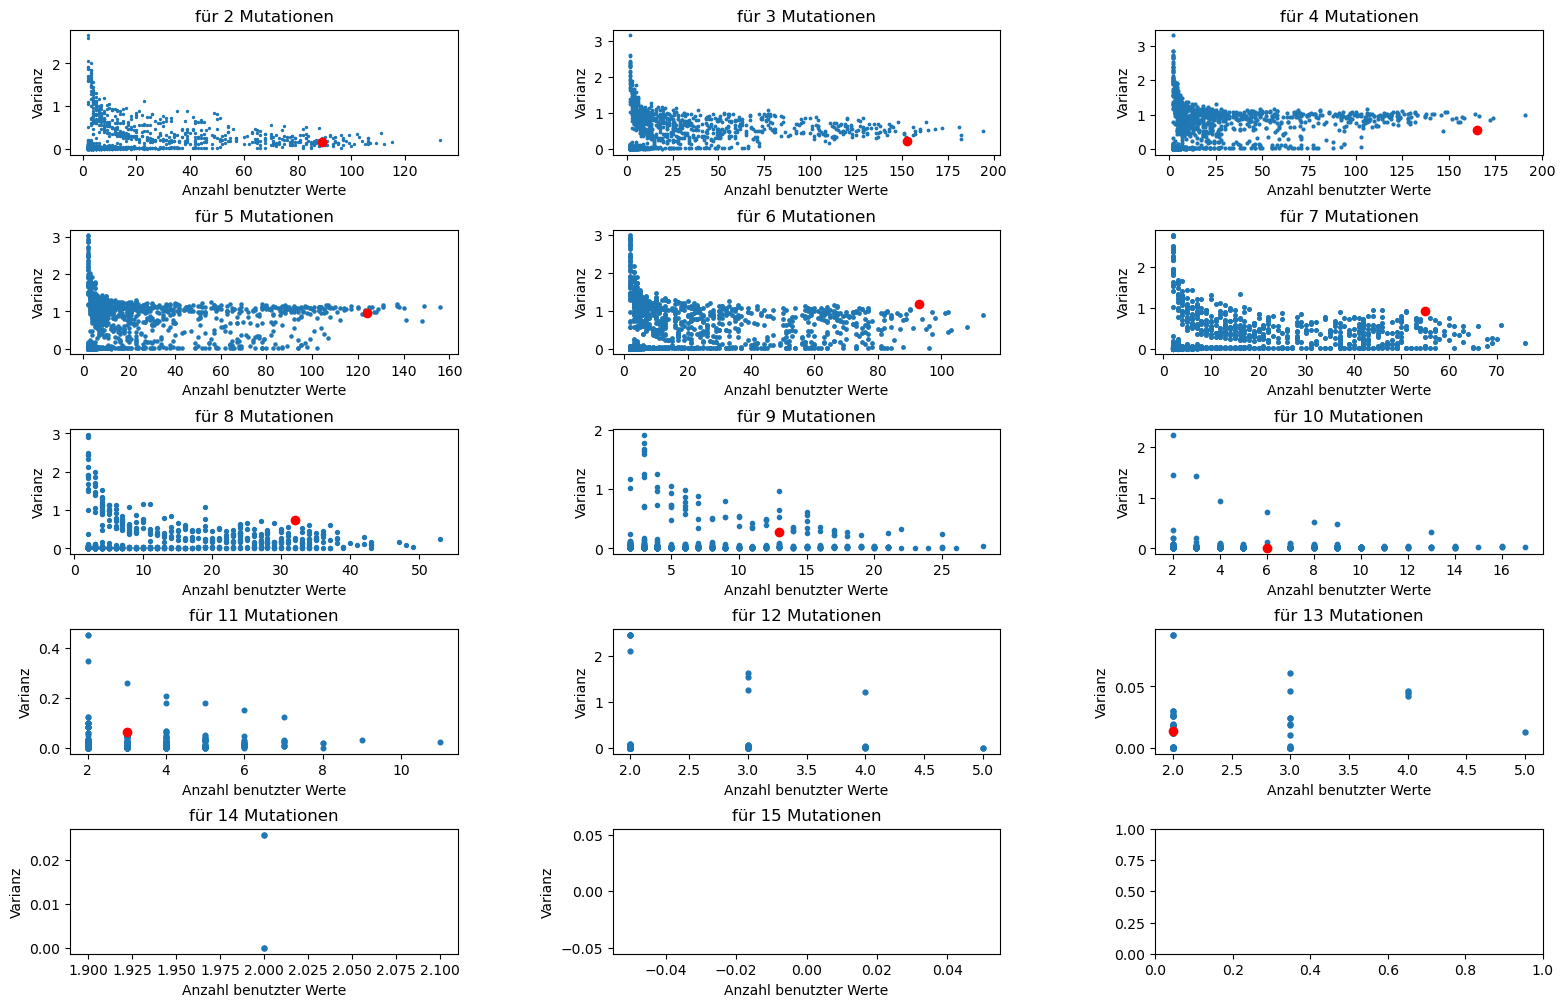

In [11]:
#plots für jeden mutcount varianz gegen how_many

import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(19, 12))  # Abbildung und Achsenobjekte erstellen
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for j, ax in zip(range(2, 16), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()
        variance_per_mutant_list.append(varianz_mut)

    variance_per_mutant_series = pd.Series(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_df = variance_per_mutant_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_for_variance = pd.Series(how_many_for_variance, index=all_possible_mutations)
    how_many_for_variance_df = how_many_for_variance.to_frame()


    how_many_AND_variance_df = pd.concat([how_many_for_variance_df, variance_per_mutant_df], axis = 1)
    how_many_AND_variance_df.columns = ['Anzahl benutzter Werte', 'Varianz']
    how_many_AND_variance_df = how_many_AND_variance_df.dropna()

#scatter plot erstellen, mit benennungen
    ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte'],how_many_AND_variance_df['Varianz'], s = j )
    ax.set_xlabel('Anzahl benutzter Werte')
    ax.set_ylabel('Varianz')

    if "V163A" in how_many_AND_variance_df.index:
        ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df['Varianz']['V163A'], c='red')
    ax.set_title(f'für {j} Mutationen')
# Diagramm anzeigen

plt.show()


VORBEREITUNG RANKINGS: Definitionen etc


In [12]:
#Varianzen mitteln für jede Mutation, über die Mutationscounts hinweg
frame_zum_mitteln_variance = pd.DataFrame(index = all_possible_mutations)
variance_per_mutant_count_list = []

# ACHTUNG: es werden nur counts von 2 bis 7 einbezogen weil die mit mehr sowieso "kaputt" sind!!!
for j, ax in zip(range(2, 15), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()  #die varianz je mutation je anzahl
        variance_per_mutant_list.append(varianz_mut) #liste der Varianzen ALLER Mutationen je anzahl

    variance_per_mutant_df = pd.DataFrame(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_count_list.append(variance_per_mutant_df)
variance_per_mutant_count_df = pd.concat(variance_per_mutant_count_list, axis=1)
variance_per_mutant_count_df.set_axis(range(2,15), axis=1, inplace=True)

# Varianz je Mutation je Mutationanzahl
variance_per_mutant_count_df
# dataframe mit allen varianzen (Zellen) pro alle mutationen (rows) pro alle counts (columns)
mean_variances_per_mutations = pd.DataFrame(variance_per_mutant_count_df.mean(axis=1, skipna=True), columns=['Mean'])


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/2649729929.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  variance_per_mutant_count_df.set_axis(range(2,15), axis=1, inplace=True)


In [13]:
print(variance_per_mutant_count_df)

             2         3         4         5         6         7         8   \
L207Q  0.931943  0.155405  0.355669  0.038407  0.018115  0.041437  0.031774   
I167M       NaN  0.043301       NaN       NaN       NaN       NaN       NaN   
Y74R        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
F99T        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
F223H       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
R96H   0.068381  0.025567  0.014495  0.030708  0.041629  0.028630  0.034242   
N121H       NaN  0.016061  0.037002  0.744676       NaN       NaN       NaN   
V55E   0.036985  0.022147  0.017819  0.020443  0.012687  0.020603  0.006444   
H77N        NaN       NaN  0.011150  1.353083  0.013199       NaN  2.445167   
Y145N  0.007823  0.844155  1.068020  0.623568  0.237272  0.684867  0.057002   

             9         10  11        12        13  

In [46]:
#dataframe with the mean fscores of each mutationcount
mean_fitness_scores = pd.DataFrame(index=range(2, 16), columns=['mean_fitness_score'])

for j in range(2, 16):
    fscore_mutcount_mean = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j].mean()
    mean_fitness_scores.loc[j, 'mean_fitness_score'] = fscore_mutcount_mean

print(mean_fitness_scores)

   mean_fitness_score
1            3.432724
2            3.345506
3            3.012676
4            2.554671
5            2.110624
6            1.798413
7            1.599889
8            1.513703
9            1.440711
10           1.430934
11           1.394099
12           1.465141
13           1.403067
14           1.414609
15           1.326549


In [70]:
##mean of the variance weighted -> sum of all mean_variance_permutcount * mean_fitness_score_per_mutcount divided by the sum of all used mean_fitness_score_per_mutcount, because apparently that´s necessary?

weighted_mean_per_mutant_df = pd.DataFrame(index=all_possible_mutations)

for mutation in all_possible_mutations:
    weighted_mean = 0
    total_weight = 0

    for mutation_count in range(2, 15):
        variance = variance_per_mutant_count_df.loc[mutation, mutation_count]

        if not np.isnan(variance):
            mean_fitness_score = mean_fitness_scores.at[mutation_count, 'mean_fitness_score']
            weighted_mean += variance * mean_fitness_score
            total_weight += mean_fitness_score

    if total_weight != 0:
        weighted_mean /= total_weight

    weighted_mean_per_mutant_df.at[mutation, 'weighted_mean'] = weighted_mean
print(weighted_mean_per_mutant_df)

       weighted_mean
L207Q       4.897942
I167M       0.130453
Y74R        0.000000
F99T        0.000000
F223H       0.000000
...              ...
R96H        0.589186
N121H       1.714644
V55E        0.374540
H77N        6.609325
Y145N       8.277388

[1810 rows x 1 columns]


In [71]:
how_many_per_mutant_count_list = []

for j, ax in zip(range(2, 8), axes.flatten()):
    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_per_mutant_df = pd.DataFrame(how_many_for_variance, index=all_possible_mutations)
    how_many_per_mutant_count_list.append(how_many_per_mutant_df)
how_many_per_mutant_count_df = pd.concat(how_many_per_mutant_count_list, axis=1)
how_many_per_mutant_count_df.set_axis(range(2,8), axis=1, inplace=True)

mean_how_many_per_mutations = pd.DataFrame(how_many_per_mutant_count_df.mean(axis=1, skipna=True), columns=['Mean'])


weighted_mean    384
dtype: int64


In [17]:
combined_means_variance_how_many = pd.concat([mean_variances_per_mutations, mean_how_many_per_mutations], axis=1)
combined_means_variance_how_many.columns = ['mean_variances_per_mutations', 'mean_how_many_per_mutations']

----------------RANKING 0: nur nach Varianz der fscores

In [39]:
sorted_Ranking0_weighted = weighted_mean_per_mutant_df.sort_values(by='weighted_mean')

# Ausgabe des sortierten DataFrames
print(sorted_Ranking0_weighted)

       weighted_mean
E124Q       0.000000
M153S       0.000000
T43V        0.000000
H77D        0.000000
Y74P        0.000000
...              ...
D180S       2.504722
D180H       2.598812
I128A       2.918393
K158W       2.924513
N185V       3.166581

[1810 rows x 1 columns]


In [40]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking0_weighted= sorted_Ranking0_weighted.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking0_weighted.html', 'w') as file:
    file.write(styled_ranking0_weighted.render())

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/961428720.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking0_weighted.render())


----------------RANKING 1: nur nach Anzahl der Muts (kind of unnötig)

In [33]:
sorted_Ranking1 = combined_means_variance_how_many.sort_values(by='mean_how_many_per_mutations', ascending= False)

# Ausgabe des sortierten DataFrames
print(sorted_Ranking1)

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/4150944384.py:21: RuntimeWarning: Mean of empty slice
  weighted_mean_with_mut_ready = np.nanmean(weighted_means_with_mut)


In [43]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking1= sorted_Ranking1.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking1.html', 'w') as file:
    file.write(styled_ranking1.render())

KeyError: 'L207Q'





----------------RANKING 1a: nach Rank aus Varianz und Anzahl

In [54]:
combined_means_variance_how_many['Rank'] = combined_means_variance_how_many['mean_variances_per_mutations'].rank(ascending=False) - combined_means_variance_how_many['mean_how_many_per_mutations'].rank()

sorted_Ranking1a = combined_means_variance_how_many.sort_values(by='Rank')

# Ausgabe des sortierten DataFrames
print(sorted_Ranking1a)

      Weighted Mean
T43C       9.475878
L42W       9.310884
K26L       9.299267
Y145G       9.29264
K214A      9.196841
...             ...
K158V           NaN
G40R            NaN
N144A           NaN
D36K            NaN
M218E           NaN

[1810 rows x 1 columns]


In [56]:
#nochmal ohne stab
condition = all_differences_means['Difference'] > 0
sorted_only_stab_Ranking1a = sorted_Ranking1a.drop(all_differences_means.loc[condition].index)
print(sorted_only_stab_Ranking1a)


,0
L207Q,172
I167M,8
Y74R,2
F99T,2
F223H,2
...,...
R96H,94
N121H,20
V55E,163
H77N,17


In [57]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking1a= sorted_only_stab_Ranking1a.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking1a.html', 'w') as file:
    file.write(styled_ranking1a.render())





----------------RANKING 2: nur nach fscore_mean Differenz

In [59]:
import pandas as pd

nur_fscore_mut_count_weighted = working_dataframe.loc[:, ["DMS_score", "mut_count"]]

# Create empty variables to store the weighted means and total weights
weighted_mean_mut = 0
weighted_mean_no_mut = 0
total_weight_mut = 0
total_weight_no_mut = 0

# Iterate over the mutation counts
for mutation_count in range(2, 15):
    mean_fitness_score = mean_fitness_scores.at[mutation_count, 'mean_fitness_score']

    index_when_mut_present = result_how_often.loc[result_how_often.any(axis=1) == True].index
    only_rows_with_mut_weighted = nur_fscore_mut_count_weighted[(nur_fscore_mut_count_weighted['mut_count'] == mutation_count) & (nur_fscore_mut_count_weighted.index.isin(index_when_mut_present))]

    index_when_not_mut_present = result_how_often.loc[result_how_often.any(axis=1) == False].index
    only_rows_without_mut_weighted = nur_fscore_mut_count_weighted[(nur_fscore_mut_count_weighted['mut_count'] == mutation_count) & (nur_fscore_mut_count_weighted.index.isin(index_when_not_mut_present))]

    if not only_rows_with_mut_weighted.empty:
        mean_with_mut = only_rows_with_mut_weighted['DMS_score'].mean()
        if not pd.isna(mean_with_mut):
            weighted_mean_mut += mean_with_mut * mean_fitness_score
            total_weight_mut += mean_fitness_score

    if not only_rows_without_mut_weighted.empty:
        mean_without_mut = only_rows_without_mut_weighted['DMS_score'].mean()
        if not pd.isna(mean_without_mut):
            weighted_mean_no_mut += mean_without_mut * mean_fitness_score
            total_weight_no_mut += mean_fitness_score


# Calculate the final weighted means
if total_weight_mut != 0:
    weighted_mean_mut /= total_weight_mut

if total_weight_no_mut != 0:
    weighted_mean_no_mut /= total_weight_no_mut

# Calculate the difference of the weighted means for each mutation
difference_means_weighted = weighted_mean_mut - weighted_mean_no_mut

# Create a DataFrame with the difference of the weighted means for each mutation
all_differences_means_weighted = pd.DataFrame({'Difference': difference_means_weighted}, index=all_possible_mutations)


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/2341232914.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking2_weighted.render())


In [24]:
print(all_differences_means_weighted)

NameError: name 'mean_fitness_scores_df' is not defined

In [61]:
#VORBEREITUNG copy&paste
list_wie_oft_mut = []
for j in all_possible_mutations:
    matching_indexes = result_how_often.loc[result_how_often[j] == True].index
    wie_oft = len(matching_indexes)
    list_wie_oft_mut.append(wie_oft)
df_wie_oft_muts_insg = pd.DataFrame(list_wie_oft_mut, index=all_possible_mutations)
df_wie_oft_muts_insg

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/2776464519.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking3_weighted.render())


In [42]:
#VORBEREITUNG copy&paste
#code für ranking aus anderem dokument aber mit den sachen von oben berücksichtigt, alle destab raus
combined_differenz_wie_oft_mut_weighted= pd.concat([all_differences_means_weighted, df_wie_oft_muts_insg], axis=1)
combined_differenz_wie_oft_mut_weighted.columns = ['Difference_weighted', 'wie oft kommt mut insg vor']


In [69]:
ranking2_weighted = combined_differenz_wie_oft_mut_weighted.sort_values(by='Difference_weighted', ascending= False)
ranking2_weighted

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/2707712803.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  score_ranking4_weighted = weighted_differences_fscore .loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0] * (1/weighted_mean_per_mutant_df.loc[i].values[0])


       ranking4_score_weighted 
E235R                       inf
K140V                       inf
N212R                       inf
L42W                        inf
N170C                       inf
...                         ...
K158V                       NaN
G40R                        NaN
N144A                       NaN
D36K                        NaN
M218E                       NaN

[1810 rows x 1 columns]


In [63]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking2_weighted= ranking2_weighted.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking2_weighted.html', 'w') as file:
    file.write(styled_ranking2_weighted.render())

/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/2629972560.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking4_weighted .render())






----------------RANKING 3: nach Differenz gewichtet nach Anzahl

In [64]:
list_ranking3_weighted = []
for i in all_possible_mutations:
    score_ranking3_weighted = all_differences_means_weighted.loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]
    list_ranking3_weighted.append(score_ranking3_weighted)

ranking3_unsorted_weighted = pd.DataFrame(list_ranking3_weighted, index=all_possible_mutations, columns=['ranking3_score_weighted'])
ranking3_weighted = ranking3_unsorted_weighted.sort_values(by='ranking3_score_weighted', ascending= False)
print(ranking3_weighted)

       ranking5_score_weighted 
E235R                       inf
K140V                       inf
N212R                       inf
L42W                        inf
N170C                       inf
...                         ...
K158V                       NaN
G40R                        NaN
N144A                       NaN
D36K                        NaN
M218E                       NaN

[1810 rows x 1 columns]


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/1846913246.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  score_ranking5_weighted  = (weighted_differences_fscore .loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]* 51714) / np.sum(weighted_mean_per_mutant_df.loc[i].values)


In [65]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking3_weighted= ranking3_weighted.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking3_weighted.html', 'w') as file:
    file.write(styled_ranking3_weighted.render())


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_55270/2059744487.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking5_weighted.render())






----------------RANKING 4: nach eigenem score1:
-> score1 = Differenz * 1/Varianz * Anzahl muts

In [ ]:
list_ranking4_weighted  = []
for i in all_possible_mutations:
    score_ranking4_weighted = all_differences_means_weighted .loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0] * (1/weighted_mean_per_mutant_df.loc[i].values[0])
    list_ranking4_weighted .append(score_ranking4_weighted )
ranking4_unsorted_weighted  = pd.DataFrame(list_ranking4_weighted , index=all_possible_mutations, columns=['ranking4_score_weighted '])
ranking4_weighted  = ranking4_unsorted_weighted .sort_values(by='ranking4_score_weighted ', ascending= False)
print(ranking4_weighted )

In [50]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking4_weighted = ranking4_weighted .style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking4_weighted .html', 'w') as file:
    file.write(styled_ranking4_weighted .render())


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_75549/2629972560.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking4_weighted .render())






----------------RANKING 5: nach eigenem score2 :
-> score2 = Differenz * aggregierte Varianz
-> Varianz: gewichten mit mutcount (aggregierte Varianz)
(Summe aller Varianzen*1/Anzahl muts)/(Gesamtzahl Mutationen)

In [ ]:
list_ranking5_weighted  = []
for i in all_possible_mutations:

    score_ranking5_weighted  = (all_differences_means_weighted .loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]* 51714) / np.sum(weighted_mean_per_mutant_df.loc[i].values)
    list_ranking5_weighted .append(score_ranking5_weighted )
ranking5_unsorted_weighted  = pd.DataFrame(list_ranking5_weighted , index=all_possible_mutations, columns=['ranking5_score_weighted '])
ranking5_weighted  = ranking5_unsorted_weighted .sort_values(by='ranking5_score_weighted ', ascending= False)
print(ranking5_weighted )

In [52]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking5_weighted= ranking5_weighted.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking5_weighted.html', 'w') as file:
    file.write(styled_ranking5_weighted.render())


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_75549/2059744487.py:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  file.write(styled_ranking5_weighted.render())







RANKING 6:


In [ ]:
delta_G_data = pd.read_csv('/Users/liza/Downloads/df_ddG.csv')

In [ ]:
count_fscore_frame['delta G'] = delta_G_data['Score']
print(count_fscore_frame)

In [ ]:
a = delta_G_data[49343]

In [ ]:

differences_delta_G_list = []

for i in all_possible_mutations:
    index_when_mut_present = result_how_often.loc[result_how_often[i] == True].index

    only_rows_with_mut = count_fscore_frame[(count_fscore_frame['mut_count'] >2) & (count_fscore_frame .index.isin(index_when_mut_present))]

# Calculate the mean of DMS_score for the filtered rows
    mean_delta_G_only_mut = only_rows_with_mut['delta G'].mean()
#-------------
    index_when_not_mut_present = result_how_often.loc[result_how_often[i] == False].index

    only_rows_withOUT_mut = count_fscore_frame[(count_fscore_frame['mut_count'] >2) & (count_fscore_frame.index.isin(index_when_not_mut_present))]

# Calculate the mean of DMS_score for the filtered rows
    mean_delta_G_every_but_mut = only_rows_withOUT_mut['delta G'].mean()
#----------------
    difference_means_delta_G = mean_delta_G_every_but_mut - mean_delta_G_only_mut
    differences_delta_G_list.append(difference_means_delta_G)

all_differences_delta_G_means = pd.DataFrame({'Difference dG': differences_delta_G_list}, index=all_possible_mutations)

#je niedriger dG desto stabiler ist Protein
#Difference "ohne - mit": kleiner besser, wenn mit besser ist als ohne ist difference positiv

In [ ]:
#VORBEREITUNG copy&paste
#code für ranking aus anderem dokument aber mit den sachen von oben berücksichtigt, alle destab raus
combined_difference_dG_wie_oft_mut = pd.concat([all_differences_delta_G_means, df_wie_oft_muts_insg], axis=1)
combined_difference_dG_wie_oft_mut.columns = ['Difference dG', 'wie oft kommt mut insg vor']

ranking6 = combined_difference_dG_wie_oft_mut.sort_values(by='Difference dG', ascending=False)

ranking6 = ranking6.drop(ranking6[~(ranking6['wie oft kommt mut insg vor'] >= 20)].index)

print(ranking6)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking6= ranking6.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking6.html', 'w') as file:
    file.write(styled_ranking6.render())



RANKING 7:
-> delta G Differenzwerte mit Ranking 5 verrechnet

In [ ]:
list_ranking7 = []
for i in all_possible_mutations:

    score_ranking7 = (all_differences_means.loc[i].values[0] * df_wie_oft_muts_insg.loc[i].values[0]* 51714) / (np.sum(variance_per_mutant_count_df.loc[i].values) * all_differences_delta_G_means.loc[i].values[0])
    list_ranking7.append(score_ranking7)
ranking7_unsorted = pd.DataFrame(list_ranking7, index=all_possible_mutations, columns=['ranking7_score'])
ranking7 = ranking7_unsorted.sort_values(by='ranking7_score', ascending= False)
print(ranking7)

In [ ]:
TOP_MUTANTS = ['V163A', 'K166Q', 'V68M', 'E172A', 'A206V', 'T43N', 'H25Q', 'S205T', 'E6K', 'T62S', 'I171V', 'T203I', 'Y39N', 'E111V', 'E32A']

# Funktion zum Formatieren der Zeilen und Hervorheben der Werte in TOP_MUTANTS
def highlight_top_mutants(row):
    color = 'red' if row.name in TOP_MUTANTS else 'black'
    return ['color: {}'.format(color)] * len(row)

# Anwendung der Formatierungsfunktion auf das gesamte DataFrame
styled_ranking7= ranking7.style.apply(highlight_top_mutants, axis=1)

# Den formatierten DataFrame als HTML-Datei speichern
with open('formatted_ranking7.html', 'w') as file:
    file.write(styled_ranking7.render())

In [ ]:
from scipy.stats import spearmanr
from itertools import combinations

desired_length = 10
rankings = [ranking3, ranking5]

def calculate_spearman_correlation(rank1, rank2):
    # Convert DataFrame indexes to lists
    rank1 = rank1.index.tolist()
    rank2 = rank2.index.tolist()

    # Calculate Spearman's correlation coefficient
    correlation, p_value = spearmanr(rank1, rank2)

    return correlation, p_value

# Calculate Spearman's correlation for every combination of rankings
##for combo in combinations(rankings, 2):
    ##rank1, rank2 = combo[0].head(desired_length), combo[1].head(desired_length)
    correlation, p_value = calculate_spearman_correlation(rank1, rank2)
    print("Spearman's correlation coefficient:", correlation)
    print("p-value:", p_value)
    print()


------------------TOPS untersuchen------------

In [ ]:
ranking5.head()